# 1. 탐색적 분석

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## 필요한 DataFrame 생성

In [2]:
all_hearts_df = pd.read_csv('./data/all_user_hearts.csv')
del all_hearts_df['Unnamed: 0']

In [3]:
all_sleeps_df = pd.read_csv('./data/all_user_sleeps.csv')
del all_sleeps_df['Unnamed: 0']

In [4]:
all_steps_df = pd.read_csv('./data/all_user_steps.csv')
del all_steps_df['Unnamed: 0']

### 1-a-i. 평균 걸음 수 분포

In [5]:
all_steps_df.head(5)

,USERNAME,DATE,TIME,HOUR,MINUTE,STEPS
0,A01,2016-04-01,00:00:00,0,0,0
1,A01,2016-04-01,00:01:00,0,1,0
2,A01,2016-04-01,00:02:00,0,2,0
3,A01,2016-04-01,00:03:00,0,3,0
4,A01,2016-04-01,00:04:00,0,4,0


In [6]:
sum_steps_df = all_steps_df.groupby(['USERNAME', 'DATE'])['STEPS'].sum().reset_index()
sum_steps_df.head(5)

,USERNAME,DATE,STEPS
0,A01,2016-04-01,13468
1,A01,2016-04-02,9446
2,A01,2016-04-03,6084
3,A01,2016-04-04,20283
4,A01,2016-04-05,12881


In [7]:
avg_steps_df = pd.DataFrame(sum_steps_df.groupby(['USERNAME'])['STEPS'].mean()).reset_index()

In [8]:
avg_steps_df.head(5)

,USERNAME,STEPS
0,A01,6771.02
1,A010,5254.30
2,A016,10700.10
3,A017,13946.88
4,A018,15999.28


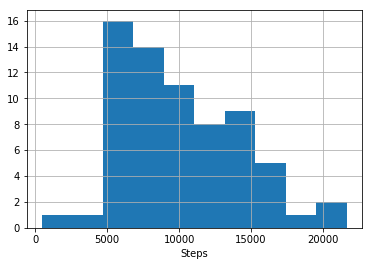

In [9]:
avg_steps_df['STEPS'].hist()
plt.xlabel('Steps')
plt.show()

걸음수 10,000보 목표를 달성하지 못한 사람은 전체중 얼마나 있을까? : 57.35%


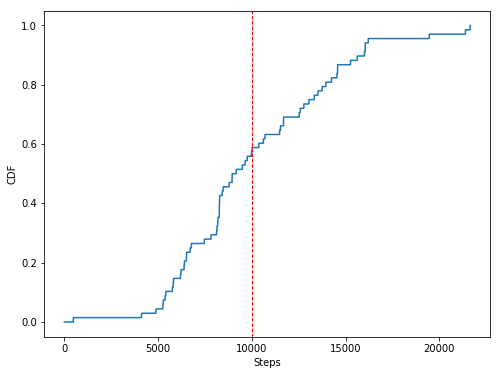

In [10]:
step_list = [int(step) for step in avg_steps_df['STEPS']]
step_list_count = np.zeros(max(step_list) + 1)
for step in step_list:
    step_list_count[int(step)] += 1
step_cumsum = step_list_count.cumsum()
step_cdf = [cumsum/step_cumsum[-1] for cumsum in step_cumsum]
print('걸음수 10,000보 목표를 달성하지 못한 사람은 전체중 얼마나 있을까? : {0}%'.format(round(step_cdf[10000]*100,2)))
plt.figure(figsize = (8,6))
plt.plot(step_cdf)
plt.axvline(x = 10000,color='r', linewidth=1, linestyle='--')
plt.xlabel('Steps')
plt.ylabel('CDF')
plt.show()

### 1-a-ii. 평균 수면량 분포

In [11]:
all_sleeps_df.head(5)

,USERNAME,DATE,STARTTIME,MINUTESASLEEP,MINUTESAWAKE,TIMEINBED
0,A01,2016-04-01,02:39:00,485,26,511
1,A01,2016-04-02,02:09:00,512,37,549
2,A01,2016-04-04,01:52:30,335,11,346
3,A01,2016-04-05,02:04:00,311,24,335
4,A01,2016-04-06,01:49:00,491,59,551


In [12]:
avg_sleeps_df = pd.DataFrame(all_sleeps_df.groupby(['USERNAME'])['MINUTESASLEEP'].mean()).reset_index()
avg_sleeps_df.head(5)

,USERNAME,MINUTESASLEEP
0,A01,371.357143
1,A010,420.733333
2,A016,303.900000
3,A017,343.816327
4,A018,370.217391


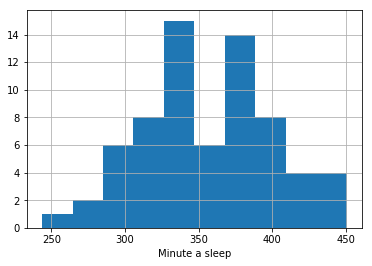

In [13]:
avg_sleeps_df['MINUTESASLEEP'].hist()
plt.xlabel('Minute a sleep')
plt.show()

성인 하루 권장 수면 시간 6시간을 지키지 못한 사람은 얼마나 있을까? : 48.53%


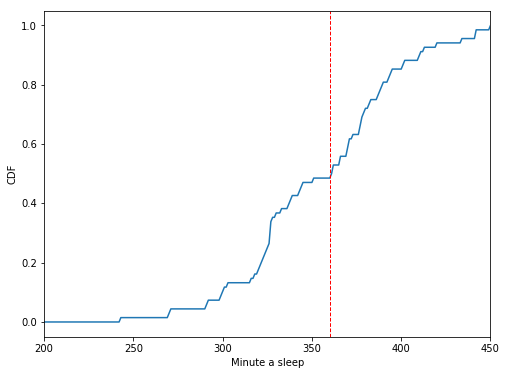

In [14]:
sleep_list = [int(sleep) for sleep in avg_sleeps_df['MINUTESASLEEP']]
sleep_list_count = np.zeros(max(sleep_list) + 1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]
print('성인 하루 권장 수면 시간 6시간을 지키지 못한 사람은 얼마나 있을까? : {0}%'.format(round(sleep_cdf[360]*100,2)))
plt.figure(figsize = (8,6))
plt.plot(sleep_cdf)
plt.axvline(x = 360,color='r', linewidth=1, linestyle='--')
plt.xlim(200,450)
plt.xlabel('Minute a sleep')
plt.ylabel('CDF')
plt.show()

### 1-a-iii. 평균 심박수 분포

In [15]:
all_hearts_df.head(5)

,USERNAME,DATE,TIME,VALUE
0,A01,2016-04-01,00:00:00,79
1,A01,2016-04-01,00:01:00,80
2,A01,2016-04-01,00:02:00,78
3,A01,2016-04-01,00:03:00,73
4,A01,2016-04-01,00:04:00,77


In [16]:
avg_hearts_df = all_hearts_df.groupby(['USERNAME'])['VALUE'].mean().reset_index()
avg_hearts_df.head(5)

,USERNAME,VALUE
0,A01,81.620110
1,A010,75.746871
2,A016,83.961060
3,A017,77.922819
4,A018,74.145573


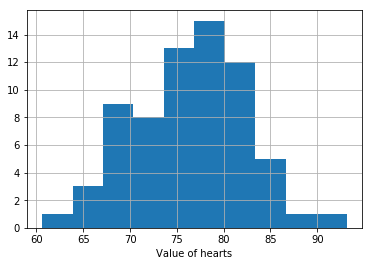

In [17]:
avg_hearts_df['VALUE'].hist()
plt.xlabel('Value of hearts')
plt.show()

하루 평균 심박수가 60이하인 사람들 : 1.47%


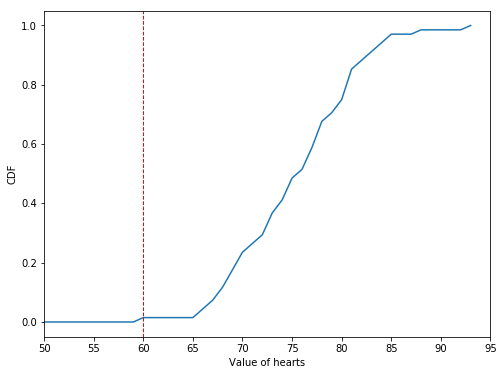

In [18]:
heart_list = [int(heart) for heart in avg_hearts_df['VALUE']]
heart_list_count = np.zeros(max(heart_list) + 1)
for heart in heart_list:
    heart_list_count[int(heart)] += 1
heart_cumsum = heart_list_count.cumsum()
heart_cdf = [cumsum/heart_cumsum[-1] for cumsum in heart_cumsum]
print('하루 평균 심박수가 60이하인 사람들 : {0}%'.format(round(heart_cdf[60]*100,2)))
plt.figure(figsize = (8,6))
plt.plot(heart_cdf)
plt.axvline(x = 60,color='r', linewidth=1, linestyle='--')
plt.xlim(50,95)
plt.xlabel('Value of hearts')
plt.ylabel('CDF')
plt.show()

## 1-b. 걸음, 수면 상관관계 요인

#### steps Dataframe에 WEEKDAY column 추가

In [19]:
all_steps_df['DATE'] = pd.to_datetime(all_steps_df['DATE'], format='%Y-%m-%d')
all_steps_df['WEEKDAY'] = all_steps_df['DATE'].apply(lambda x: x.weekday())
all_steps_df.head(5)

,USERNAME,DATE,TIME,HOUR,MINUTE,STEPS,WEEKDAY
0,A01,2016-04-01,00:00:00,0,0,0,4
1,A01,2016-04-01,00:01:00,0,1,0,4
2,A01,2016-04-01,00:02:00,0,2,0,4
3,A01,2016-04-01,00:03:00,0,3,0,4
4,A01,2016-04-01,00:04:00,0,4,0,4


#### USERNAME, DATE, WEEKDAY로 groupby해준 후, STEPS를 더한 값을 STEPS column에 쓰기

In [20]:
temp_steps_df = all_steps_df.groupby(['USERNAME','DATE','WEEKDAY'])['STEPS'].sum().reset_index()

#### 날짜별 평균 걸음수

In [21]:
day_steps_df = pd.DataFrame(temp_steps_df.groupby(['DATE'])['STEPS'].mean()).reset_index()
day_steps_df.head(5)

,DATE,STEPS
0,2016-04-01,11632.500000
1,2016-04-02,10662.938462
2,2016-04-03,7870.104478
3,2016-04-04,16206.477612
4,2016-04-05,13893.089552


#### sleeps Dataframe에 WEEKDAY column 추가

In [22]:
all_sleeps_df['DATE'] = pd.to_datetime(all_sleeps_df['DATE'], format='%Y-%m-%d')
all_sleeps_df['WEEKDAY'] = all_sleeps_df['DATE'].apply(lambda x: x.weekday())
all_sleeps_df.head(5)

,USERNAME,DATE,STARTTIME,MINUTESASLEEP,MINUTESAWAKE,TIMEINBED,WEEKDAY
0,A01,2016-04-01,02:39:00,485,26,511,4
1,A01,2016-04-02,02:09:00,512,37,549,5
2,A01,2016-04-04,01:52:30,335,11,346,0
3,A01,2016-04-05,02:04:00,311,24,335,1
4,A01,2016-04-06,01:49:00,491,59,551,2


#### 날짜별 평균 수면시간

In [23]:
day_sleeps_df = all_sleeps_df.groupby(['DATE'])['MINUTESASLEEP'].mean().reset_index()
day_sleeps_df.head(5)

,DATE,MINUTESASLEEP
0,2016-04-01,343.771930
1,2016-04-02,336.525424
2,2016-04-03,422.937500
3,2016-04-04,359.189655
4,2016-04-05,335.931034


#### 날짜별 weather각 요소 가져오기

In [24]:
weather_df = pd.read_csv('./data/sokulee_weather.csv')
weather_df.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,133,2016-04-01 00:00,10.8,NaN,0.0,38
1,133,2016-04-01 01:00,9.5,NaN,0.1,49
2,133,2016-04-01 02:00,8.6,NaN,0.3,49
3,133,2016-04-01 03:00,7.8,NaN,1.1,52
4,133,2016-04-01 04:00,6.5,NaN,0.1,60


In [25]:
#강수량 NaN 처리
weather_df = weather_df.fillna(0)

#### DATETIME 칼럼에서 DATE만 가져와서 새로운 칼럼 생성 후 저장

In [26]:
weather_df['DATE'] = weather_df['DATETIME'].apply(lambda x: x[0:10])
weather_df.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,DATE
0,133,2016-04-01 00:00,10.8,0.0,0.0,38,2016-04-01
1,133,2016-04-01 01:00,9.5,0.0,0.1,49,2016-04-01
2,133,2016-04-01 02:00,8.6,0.0,0.3,49,2016-04-01
3,133,2016-04-01 03:00,7.8,0.0,1.1,52,2016-04-01
4,133,2016-04-01 04:00,6.5,0.0,0.1,60,2016-04-01


#### 날짜별 최고기온 df 생성

In [27]:
tem_df = weather_df.groupby(['DATE'])['TEMPERATURE'].max().reset_index()
tem_df.head(5)

,DATE,TEMPERATURE
0,2016-04-01,24.9
1,2016-04-02,24.1
2,2016-04-03,16.3
3,2016-04-04,18.0
4,2016-04-05,20.5


#### 날짜별 총 강수량 df 생성

In [28]:
rain_df = weather_df.groupby(['DATE'])['RAINFALL'].sum().reset_index()
rain_df.head(5)

,DATE,RAINFALL
0,2016-04-01,0.0
1,2016-04-02,0.0
2,2016-04-03,2.5
3,2016-04-04,0.0
4,2016-04-05,0.0


#### 날짜별 평균 습도 df 생성

In [29]:
hum_df = weather_df.groupby(['DATE'])['HUMIDITY'].mean().reset_index()
hum_df.head(5)

,DATE,HUMIDITY
0,2016-04-01,37.208333
1,2016-04-02,40.958333
2,2016-04-03,64.916667
3,2016-04-04,72.375000
4,2016-04-05,40.125000


#### 날짜별 평균 풍속 df 생성

In [30]:
wind_df = weather_df.groupby(['DATE'])['WINDSPEED'].mean().reset_index()
wind_df.head(5)

,DATE,WINDSPEED
0,2016-04-01,0.979167
1,2016-04-02,1.145833
2,2016-04-03,1.379167
3,2016-04-04,1.887500
4,2016-04-05,1.712500


#### Sub DataFrame에 필요한 column들 합치기

In [31]:
attached_df = day_steps_df[['DATE', 'STEPS']]
attached_df['MINUTESASLEEP'] = day_sleeps_df['MINUTESASLEEP']
attached_df['TEMPERATURE'] = tem_df['TEMPERATURE']
attached_df['RAINFALL'] = rain_df['RAINFALL']
attached_df['WINDSPEED'] = wind_df['WINDSPEED']
attached_df['HUMIDITY'] = hum_df['HUMIDITY']

In [32]:
attached_df['WEEKDAY'] = attached_df['DATE'].apply(lambda x: x.weekday())
attached_df.head(5)

,DATE,STEPS,MINUTESASLEEP,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,WEEKDAY
0,2016-04-01,11632.500000,343.771930,24.9,0.0,0.979167,37.208333,4
1,2016-04-02,10662.938462,336.525424,24.1,0.0,1.145833,40.958333,5
2,2016-04-03,7870.104478,422.937500,16.3,2.5,1.379167,64.916667,6
3,2016-04-04,16206.477612,359.189655,18.0,0.0,1.887500,72.375000,0
4,2016-04-05,13893.089552,335.931034,20.5,0.0,1.712500,40.125000,1


C:\Users\InT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


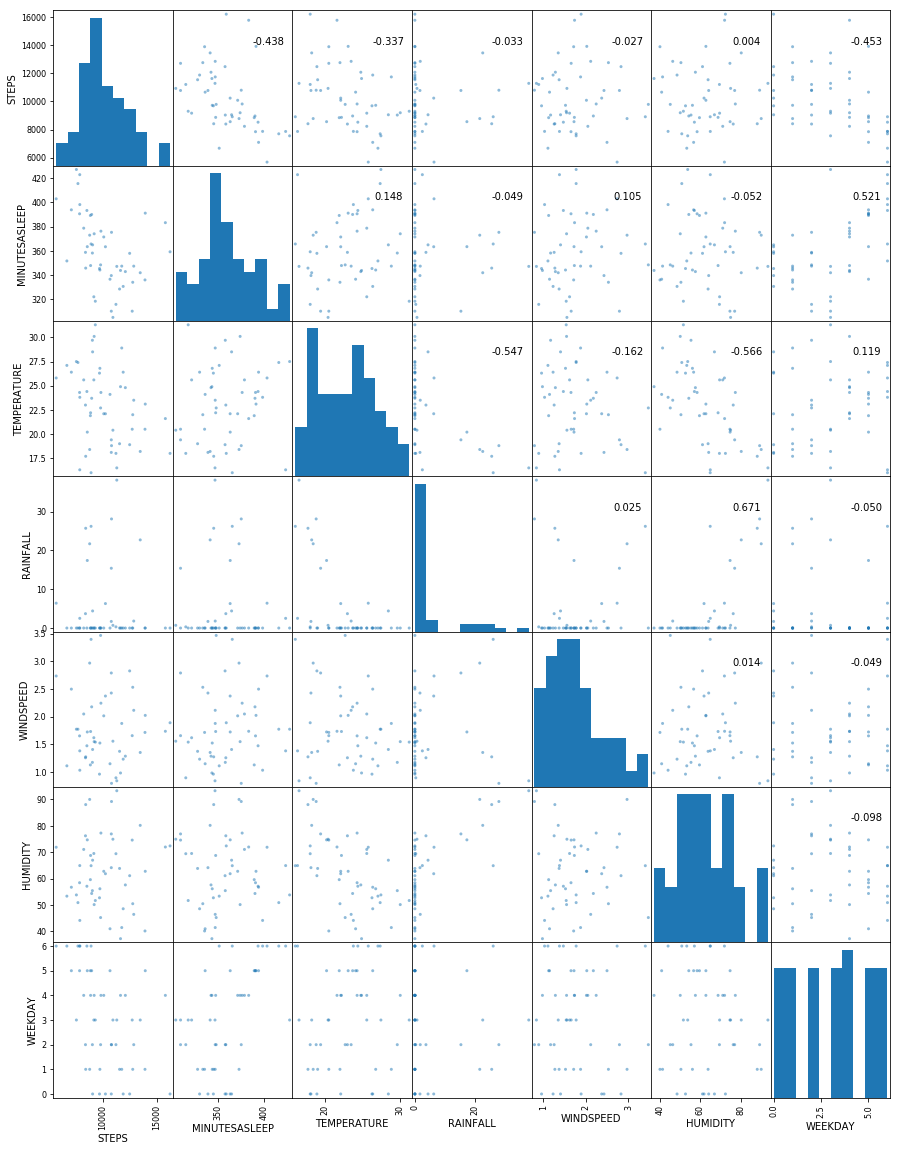

In [33]:
axes = pd.plotting.scatter_matrix(attached_df, figsize = (15, 20), alpha = 0.5)

corr = attached_df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords = 'axes fraction', ha='center',va = 'center')
plt.show()

### 1-b-i. 요일

#### steps Dataframe에 WEEKDAY column 추가

In [34]:
all_steps_df['DATE'] = pd.to_datetime(all_steps_df['DATE'], format='%Y-%m-%d')
all_steps_df['WEEKDAY'] = all_steps_df['DATE'].apply(lambda x: x.weekday())
all_steps_df.head(5)

,USERNAME,DATE,TIME,HOUR,MINUTE,STEPS,WEEKDAY
0,A01,2016-04-01,00:00:00,0,0,0,4
1,A01,2016-04-01,00:01:00,0,1,0,4
2,A01,2016-04-01,00:02:00,0,2,0,4
3,A01,2016-04-01,00:03:00,0,3,0,4
4,A01,2016-04-01,00:04:00,0,4,0,4


#### USERNAME, DATE, WEEKDAY로 groupby해준 후, STEPS를 더한 값을 STEPS column에 쓰기

In [35]:
week_steps_df = all_steps_df.groupby(['USERNAME','DATE','WEEKDAY'])['STEPS'].sum().reset_index()

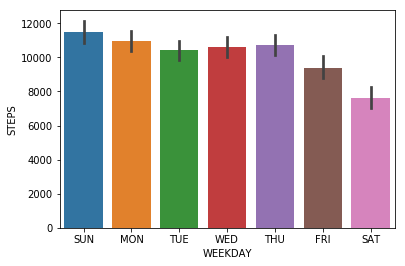

In [36]:
ax = sns.barplot(x = 'WEEKDAY', y='STEPS', data=week_steps_df)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

#### sleeps Dataframe에 WEEKDAY column 추가

In [37]:
all_sleeps_df['DATE'] = pd.to_datetime(all_sleeps_df['DATE'], format='%Y-%m-%d')
all_sleeps_df['WEEKDAY'] = all_sleeps_df['DATE'].apply(lambda x: x.weekday())
all_sleeps_df.head(5)

,USERNAME,DATE,STARTTIME,MINUTESASLEEP,MINUTESAWAKE,TIMEINBED,WEEKDAY
0,A01,2016-04-01,02:39:00,485,26,511,4
1,A01,2016-04-02,02:09:00,512,37,549,5
2,A01,2016-04-04,01:52:30,335,11,346,0
3,A01,2016-04-05,02:04:00,311,24,335,1
4,A01,2016-04-06,01:49:00,491,59,551,2


#### 요일별 평균 수면시간

In [38]:
week_sleeps_df = all_sleeps_df.groupby(['USERNAME','DATE','WEEKDAY'])['MINUTESASLEEP'].mean().reset_index()
#week_sleeps_df.head(5)

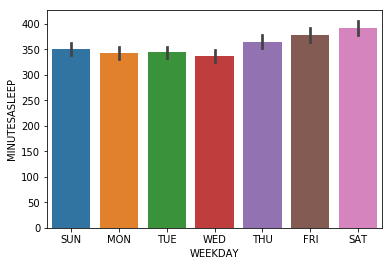

In [39]:
ax = sns.barplot(x = 'WEEKDAY', y='MINUTESASLEEP', data=week_sleeps_df)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

### 1-b-ii. 최고기온

#### weater 파일 읽기

In [40]:
weather_df = pd.read_csv('./data/sokulee_weather.csv')
weather_df.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,133,2016-04-01 00:00,10.8,NaN,0.0,38
1,133,2016-04-01 01:00,9.5,NaN,0.1,49
2,133,2016-04-01 02:00,8.6,NaN,0.3,49
3,133,2016-04-01 03:00,7.8,NaN,1.1,52
4,133,2016-04-01 04:00,6.5,NaN,0.1,60


#### DATE 뽑아내기

In [41]:
weather_df['DATE'] = weather_df['DATETIME'].apply(lambda x: x[0:10])
weather_df.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,DATE
0,133,2016-04-01 00:00,10.8,NaN,0.0,38,2016-04-01
1,133,2016-04-01 01:00,9.5,NaN,0.1,49,2016-04-01
2,133,2016-04-01 02:00,8.6,NaN,0.3,49,2016-04-01
3,133,2016-04-01 03:00,7.8,NaN,1.1,52,2016-04-01
4,133,2016-04-01 04:00,6.5,NaN,0.1,60,2016-04-01


In [42]:
weather_df = pd.DataFrame(weather_df.groupby(['DATE'])['TEMPERATURE'].max().reset_index())
weather_df

,DATE,TEMPERATURE
0,2016-04-01,24.9
1,2016-04-02,24.1
2,2016-04-03,16.3
3,2016-04-04,18.0
4,2016-04-05,20.5
5,2016-04-06,23.5
6,2016-04-07,18.2
7,2016-04-08,21.6
8,2016-04-09,23.1
9,2016-04-10,24.4


#### 각 날짜의 평균 걸음수 계산

In [43]:
time_steps_df = all_steps_df.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()
time_steps_df.head(5)

,USERNAME,DATE,STEPS
0,A01,2016-04-01,13468
1,A01,2016-04-02,9446
2,A01,2016-04-03,6084
3,A01,2016-04-04,20283
4,A01,2016-04-05,12881


In [44]:
time_steps_df = time_steps_df.groupby(['DATE'])['STEPS'].mean().reset_index()
time_steps_df.head(5)

,DATE,STEPS
0,2016-04-01,11632.500000
1,2016-04-02,10662.938462
2,2016-04-03,7870.104478
3,2016-04-04,16206.477612
4,2016-04-05,13893.089552


In [45]:
print("weather_df's length: ",len(weather_df))
print("time_steps_df's length: ",len(time_steps_df))

weather_df's length:  50
time_steps_df's length:  50


In [46]:
list = np.zeros(50)
list = list.astype('str')
for i in range(50):
    if i == 0 or i == 9 or i == 19 or i == 29 or i == 39 :
        list[0] = '2016-04-01'
        list[9] = '2016-04-11'
        list[19] = '2016-04-21'
        list[29] = '2016-05-01'
        list[39] = '2016-05-11'
    else:
        list[i] = ''

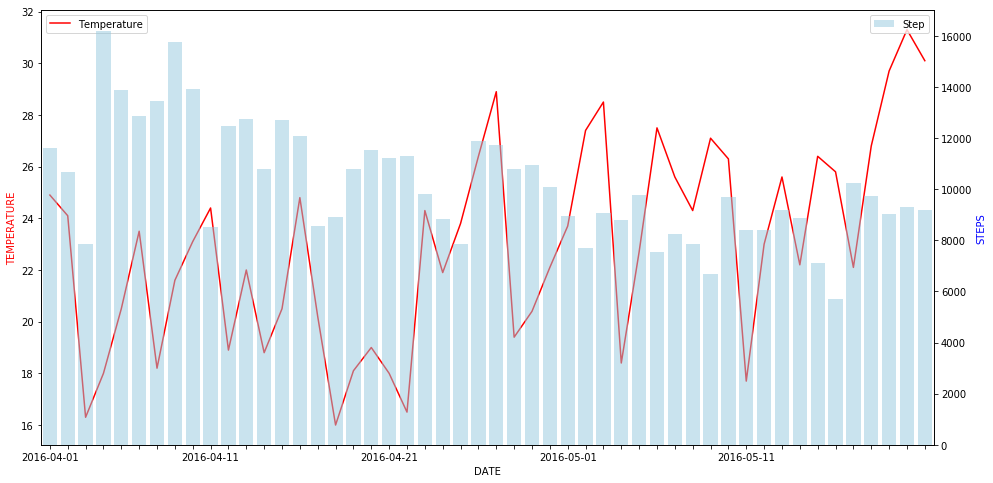

In [47]:

ax2, ax1 = plt.subplots(figsize=(16,8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature(C)', color='red')
ax1 = sns.lineplot(x = 'DATE', y = 'TEMPERATURE', data = weather_df, color = 'red', label = 'Temperature')
plt.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('STEPS', color='blue')
ax2 = sns.barplot(time_steps_df['DATE'], time_steps_df['STEPS'],color='skyblue',label='Step', alpha = 0.5)
ax1.set_xticklabels(list)
plt.legend()

plt.show()

### 1-b-iii 강수량

#### weather 파일 읽기

In [48]:
weather_df2 = pd.read_csv('./data/sokulee_weather.csv')
weather_df2.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,133,2016-04-01 00:00,10.8,NaN,0.0,38
1,133,2016-04-01 01:00,9.5,NaN,0.1,49
2,133,2016-04-01 02:00,8.6,NaN,0.3,49
3,133,2016-04-01 03:00,7.8,NaN,1.1,52
4,133,2016-04-01 04:00,6.5,NaN,0.1,60


In [49]:
# NaN 처리 (강수량 NaN 존재)
weather_df2 = weather_df2.fillna(0)

#### DATE 뽑아내기

In [50]:
weather_df2['DATE'] = weather_df2['DATETIME'].apply(lambda x: x[0:10])
weather_df2.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,DATE
0,133,2016-04-01 00:00,10.8,0.0,0.0,38,2016-04-01
1,133,2016-04-01 01:00,9.5,0.0,0.1,49,2016-04-01
2,133,2016-04-01 02:00,8.6,0.0,0.3,49,2016-04-01
3,133,2016-04-01 03:00,7.8,0.0,1.1,52,2016-04-01
4,133,2016-04-01 04:00,6.5,0.0,0.1,60,2016-04-01


#### 각 날짜의 누적 강수량 계산

In [51]:
sum_rain_df = weather_df2.groupby(['DATE'])['RAINFALL'].sum().reset_index()
sum_rain_df.head(5)

,DATE,RAINFALL
0,2016-04-01,0.0
1,2016-04-02,0.0
2,2016-04-03,2.5
3,2016-04-04,0.0
4,2016-04-05,0.0


In [52]:
print(type(time_steps_df['DATE'][0]))
print(type(sum_rain_df['DATE'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>


In [53]:
time_steps_df['DATE'] = time_steps_df['DATE'].astype('str')

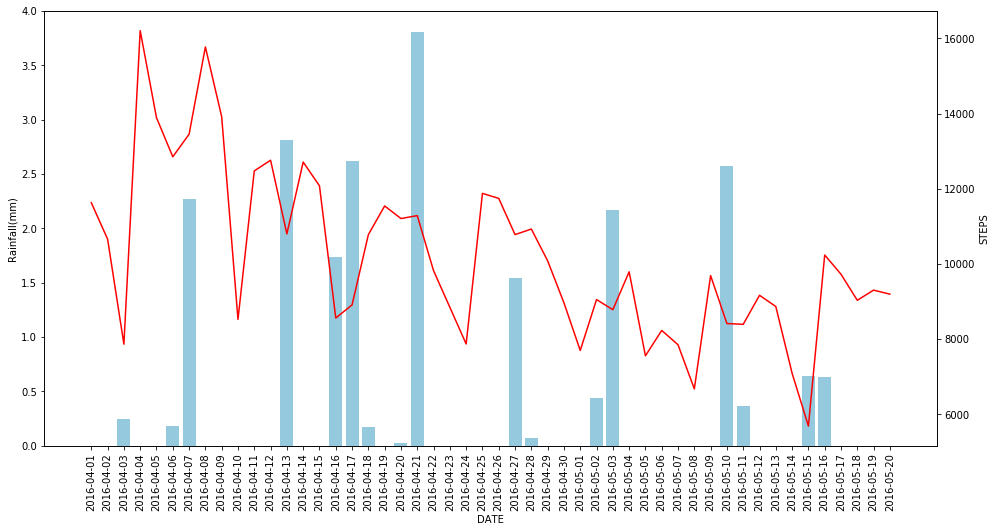

In [54]:
ax4, ax3 = plt.subplots(figsize=(16,8))

ax3 = sns.barplot(sum_rain_df.DATE , sum_rain_df.RAINFALL*0.1, color = 'skyblue', ci = False)
ax3.set(xlabel = 'DATE' , ylabel = 'Rainfall(mm)')

ax4 = ax3.twinx()
ax4 = sns.lineplot(time_steps_df.DATE, time_steps_df.STEPS, color='red', ci = False)
ax4.set(xlabel = 'DATE' , ylabel = 'STEPS')
ax3.set_xticklabels(time_steps_df.DATE[:], rotation = 90)

plt.show()

### 1-c Fitbit 하루 이용자 변화 분석

In [55]:
using_df = all_hearts_df.groupby(['USERNAME', 'DATE'])['VALUE'].count().reset_index()
using_df.head(5)

,USERNAME,DATE,VALUE
0,A01,2016-04-01,1148
1,A01,2016-04-02,1398
2,A01,2016-04-03,1409
3,A01,2016-04-04,1238
4,A01,2016-04-05,1267


In [56]:
user_count_df = using_df.groupby('DATE')['VALUE'].size().reset_index()

In [57]:
user_count_df.head(5)

,DATE,VALUE
0,2016-04-01,51
1,2016-04-02,51
2,2016-04-03,65
3,2016-04-04,65
4,2016-04-05,66


In [58]:
#사용자 목록(A01 ~ A098) -> len = 68
userlist_df = pd.DataFrame(using_df.groupby('USERNAME')).reset_index()

In [59]:
len(userlist_df)

68

30일 이전으로 평균 94.36 % 가 착용
30일 이후로 평균 착용률: 85.22 % 가 착용
평균 9.139999999999999 % 감소


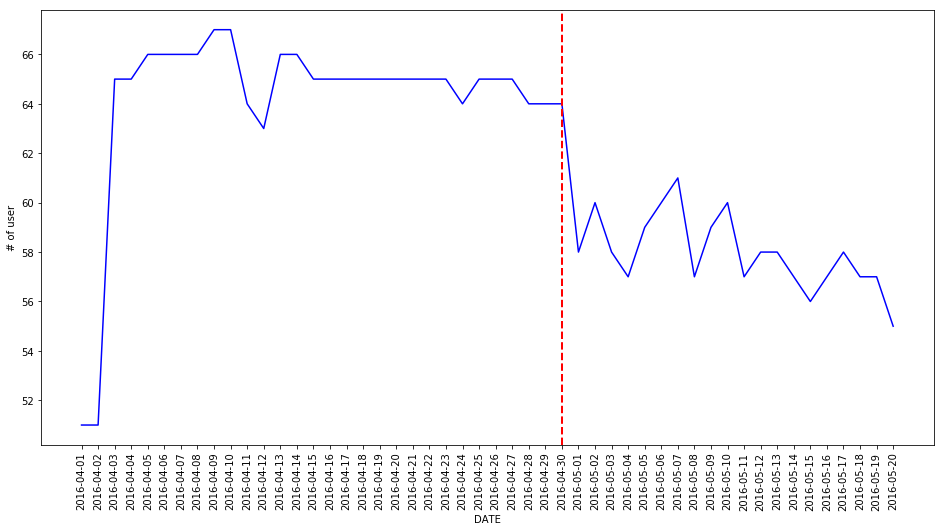

In [60]:
plt.rcParams["figure.figsize"] = (16,8)
ax = sns.lineplot(sum_rain_df.DATE , user_count_df.VALUE, color = 'blue', ci = False)
ax.set(xlabel = 'DATE' , ylabel = '# of user')
ax.set_xticklabels(time_steps_df.DATE[:], rotation = 90)

before30 = sum(user_count_df.VALUE[:30] / len(user_count_df.VALUE[:30])) / len(userlist_df)
print('30일 이전으로 평균', round(before30,4)*100,'% 가 착용')

after30 = sum(user_count_df.VALUE[30:] / len(user_count_df.VALUE[30:]) / len(userlist_df))
print('30일 이후로 평균 착용률:', round(after30,4)*100,'% 가 착용')

print('평균', round(before30-after30,4)*100,'% 감소')
    
    
plt.axvline(x = '2016-04-30',color='r', linewidth=2, linestyle='--')


plt.show()